# Tutorial for PyDruglogics

In [2]:
from pydruglogics.model import BooleanModel as bm
from pydruglogics.model import Statistics as st
from pydruglogics.model import Evolution as ev
from pydruglogics.model import ModelPredictions as mp
from pydruglogics.model import BooleanModelOptimizer as bmopt
from pydruglogics.model import InteractionModel as im
from pydruglogics.input import ModelOutputs as mo
from pydruglogics.input import TrainingData as td
from pydruglogics.input import Perturbations as pt
from pydruglogics.execution import Executor as ex

Loading files
supported formats for Boolean Models: .sif and .bnet

## Initialization, loading files

#### Supported files for Boolean Models: .sif and .bnet

In [3]:
network_sif = './ags_cascade_1.0/network.sif'
equations_bnet = './ags_cascade_1.0/network.bnet'
# training_data_file = './ags_cascade_1.0/training'
# modeloutputs_file = './ags_cascade_1.0/modeloutputs'
# perturbation_file = './ags_cascade_1.0/perturbation'
# drugpanel = './ags_cascade_1.0/drugpanel'

#### Model Outputs can be initialized from a file or a dictionary

In [4]:
model_outputs_dict = {
        "RSK_f": 1.0,
        "MYC": 1.0,
        "TCF7_f": 1.0,
        "CASP8": -1.0,
        "CASP9": -1.0,
        "FOXO_f": -1.0
    }
model_outputs = mo.ModelOutputs(input_dictionary=model_outputs_dict)

2024-10-30 22:58:31,842 - INFO - Model outputs are initialized from dictionary


In [5]:
model_outputs.print()

Model output: RSK_f, weight: 1.0
Model output: MYC, weight: 1.0
Model output: TCF7_f, weight: 1.0
Model output: CASP8, weight: -1.0
Model output: CASP9, weight: -1.0
Model output: FOXO_f, weight: -1.0


#### Training Data can be initialized from a file or an observation list as presented below 

In [6]:
 observations = [(["CASP3:0", "CASP8:0","CASP9:0","FOXO_f:0","RSK_f:1","CCND1:1",
                      "MYC:1","RAC_f:1","JNK_f:0","MAPK14:0","AKT_f:1","MMP_f:1",
                      "PTEN:0","ERK_f:1","KRAS:1","PIK3CA:1","S6K_f:1","GSK3_f:0",
                      "TP53:0","BAX:0","BCL2:1","CTNNB1:1","TCF7_f:1","NFKB_f:1"], 1.0)]

In [7]:
training_data = td.TrainingData(observations=observations)

2024-10-30 22:58:37,041 - INFO - Training data is initialized from list.


In [8]:
training_data.print()

Observation:
Condition: -
Response: CASP3:0, CASP8:0, CASP9:0, FOXO_f:0, RSK_f:1, CCND1:1, MYC:1, RAC_f:1, JNK_f:0, MAPK14:0, AKT_f:1, MMP_f:1, PTEN:0, ERK_f:1, KRAS:1, PIK3CA:1, S6K_f:1, GSK3_f:0, TP53:0, BAX:0, BCL2:1, CTNNB1:1, TCF7_f:1, NFKB_f:1
Weight: 1.0



#### Perturbations can be initialized from files (drugpanel, perturbations) or from lists as presented below. 
The perturbation data is optional. If only the drug panel is given, all perturbations are calculated.

In [9]:
 drug_panel_data = [
        ['PI', 'PIK3CA', 'inhibits'],
        ['PD', 'MEK_f'],
        ['CT','GSK3_f'],
        ['BI', 'MAPK14'],
        ['PK', 'CTNNB1'],
        ['AK', 'AKT_f'],
        ['5Z', 'MAP3K7']
    ]

In [10]:
perturbation_data = [
        ['PI'],
        ['PD'],
        ['CT'],
        ['BI'],
        ['PK'],
        ['AK'],
        ['5Z'],
        ['PI', 'PD'],
        ['PI', 'CT'],
        ['PI', 'BI'],
        ['PI', 'PK'],
        ['PI', 'AK'],
        ['PI', '5Z'],
        ['PD', 'CT'],
        ['PD', 'BI'],
        ['PD', 'PK'],
        ['PD', 'AK'],
        ['PD', '5Z'],
        ['CT', 'BI'],
        ['CT', 'PK'],
        ['CT', 'AK'],
        ['CT', '5Z'],
        ['BI', 'PK'],
        ['BI', 'AK'],
        ['BI', '5Z'],
        ['PK', 'AK'],
        ['PK', '5Z'],
        ['AK', '5Z']]

In [11]:
perturbations = pt.Perturbation(drug_data=drug_panel_data, perturbation_data=perturbation_data)

2024-10-30 22:58:44,532 - INFO - Drug panel data initialized from list.
2024-10-30 22:58:44,534 - INFO - Drug perturbations loaded.
2024-10-30 22:58:44,535 - INFO - Perturbations initialized from list.


In [12]:
perturbations.print()

[PI (targets: PIK3CA)]
[PD (targets: MEK_f)]
[CT (targets: GSK3_f)]
[BI (targets: MAPK14)]
[PK (targets: CTNNB1)]
[AK (targets: AKT_f)]
[5Z (targets: MAP3K7)]
[PI (targets: PIK3CA), PD (targets: MEK_f)]
[PI (targets: PIK3CA), CT (targets: GSK3_f)]
[PI (targets: PIK3CA), BI (targets: MAPK14)]
[PI (targets: PIK3CA), PK (targets: CTNNB1)]
[PI (targets: PIK3CA), AK (targets: AKT_f)]
[PI (targets: PIK3CA), 5Z (targets: MAP3K7)]
[PD (targets: MEK_f), CT (targets: GSK3_f)]
[PD (targets: MEK_f), BI (targets: MAPK14)]
[PD (targets: MEK_f), PK (targets: CTNNB1)]
[PD (targets: MEK_f), AK (targets: AKT_f)]
[PD (targets: MEK_f), 5Z (targets: MAP3K7)]
[CT (targets: GSK3_f), BI (targets: MAPK14)]
[CT (targets: GSK3_f), PK (targets: CTNNB1)]
[CT (targets: GSK3_f), AK (targets: AKT_f)]
[CT (targets: GSK3_f), 5Z (targets: MAP3K7)]
[BI (targets: MAPK14), PK (targets: CTNNB1)]
[BI (targets: MAPK14), AK (targets: AKT_f)]
[BI (targets: MAPK14), 5Z (targets: MAP3K7)]
[PK (targets: CTNNB1), AK (targets: AKT_f

### Initialize Boolean Model
There are **two ways** to initialize a Boolean Model:
#### Init from a sif file: 
1. **Creating an Interaction Model, which can be initialized as follows:**
  - interaction_file (required): The path to the .sif file.
  - model_name: name of the model, by default the .sif file name will be set
  - self_regulated_interactions: The default is true, if set to false, self regulated interactions will be removed.
  - remove_inputs: Trim inputs from the model. The deafult is False.
  - remove_outputs: Trim ouputs from the model. The default is False.

2. **Creating a Boolean Model, which can be initialized as follows:**
  - model (required): Interaction Model
  - model_name: The name of the model, by default the .sif file name will be set
  - mutation_type: There are 3 options: topology, mixed, balanced. The default is balanced
  - attractor_tool:
    - mpbn (default),
    - pyboolnet
  - attractor_type:
    - stable_states (default),
    - trapspaces

#### Init from bnet file
**Creating a Boolean Model, which can be initialized as follows:**
  - file (required): The path to the .bnet file.
  - model_name: The name of the model.
  - mutation_type: There are 3 options: topology, mixed, balanced. The default is balanced
  - attractor_tool:
    - mpbn (default),
    - pyboolnet
  - attractor_type:
    - stable_states (default),
    - trapspaces

#### Initialize Boolean Model from .sif file

In [13]:
model = im.InteractionModel(interactions_file=network_sif)
model.print()

2024-10-30 23:01:18,894 - INFO - Interactions loaded successfully
Target: Antisurvival, activating regulators: CASP3, FOXO_f
Target: CASP3, activating regulators: CASP8, CASP9
Target: FOXO_f, inhibitory regulators: NLK, AKT_f
Target: Prosurvival, activating regulators: MYC, CCND1
Target: CCND1, activating regulators: RSK_f, TCF7_f
Target: MYC, activating regulators: TCF7_f
Target: RAC_f, activating regulators: mTORC2_c, DVL_f
Target: mTORC2_c, activating regulators: TSC_f, inhibitory regulators: S6K_f
Target: DVL_f, activating regulators: FZD_f
Target: MAP3K4, activating regulators: RAC_f
Target: MAP3K11, activating regulators: RAC_f
Target: MAP2K4, activating regulators: GRAP2, MAP3K4, MAP3K11, MAP3K7
Target: MAP3K7, activating regulators: TAB_f
Target: GRAP2, inhibitory regulators: MAPK14
Target: MAP2K7, activating regulators: GRAP2, MAP3K7
Target: JNK_f, activating regulators: MAP2K7, MAP2K4, inhibitory regulators: DUSP1
Target: DUSP1, activating regulators: MAPK14, MSK_f
Target: MA

In [16]:
boolean_model_sif = bm.BooleanModel(model=model, model_name='test1',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='stable_states')

2024-10-30 23:01:53,055 - INFO - Boolean Model from Interaction Model is created.


In [17]:
boolean_model_sif.print()

Antisurvival *= (CASP3 or FOXO_f)
CASP3 *= (CASP8 or CASP9)
FOXO_f *= not (NLK or AKT_f)
Prosurvival *= (MYC or CCND1)
CCND1 *= (RSK_f or TCF7_f)
MYC *= (TCF7_f)
RAC_f *= (mTORC2_c or DVL_f)
mTORC2_c *= (TSC_f) and not (S6K_f)
DVL_f *= (FZD_f)
MAP3K4 *= (RAC_f)
MAP3K11 *= (RAC_f)
MAP2K4 *= (GRAP2 or MAP3K4 or MAP3K11 or MAP3K7)
MAP3K7 *= (TAB_f)
GRAP2 *= not (MAPK14)
MAP2K7 *= (GRAP2 or MAP3K7)
JNK_f *= (MAP2K7 or MAP2K4) and not (DUSP1)
DUSP1 *= (MAPK14 or MSK_f)
MAPK14 *= (MAP2K3 or MAP2K4) and not (DUSP1)
MAP2K3 *= (MAP3K5 or MAP3K7)
MAP3K5 *= not (AKT_f)
AKT_f *= (PDPK1 or mTORC2_c)
TAB_f *= not (MAPK14)
MSK_f *= (MAPK14 or ERK_f)
RTPK_f *= (RTPK_g or MMP_f) and not (MAPK14 or MEK_f)
RTPK_g *= (FOXO_f)
MEK_f *= (MAP3K8 or RAF_f) and not (ERK_f)
SHC1 *= (RTPK_f) and not (PTEN)
PTEN *= (PTEN_g) and not (GSK3_f)
GRB2 *= (SHC1)
SOS1 *= (GRB2) and not (ERK_f)
ERK_f *= (MEK_f) and not (DUSP6)
KRAS *= (SOS1 or PTPN11)
PTPN11 *= (GAB_f)
RAF_f *= (KRAS) and not (RHEB or AKT_f or ERK_f)
RHEB

#### Initialize Boolean Model from .bnet file

In [19]:
boolean_model_bnet = bm.BooleanModel(file=equations_bnet, model_name='test2',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='trapspaces')

2024-10-30 23:02:45,738 - INFO - Boolean Model from .bnet file is created.


## Run the Evolution and the Predictions at once with Executor
- **Required Parameters:**
  - BooleanModel,
  - ModelOutputs,
  - Perturbations
  - Genetic Algorithm Arguments (ga_args)
  - Evolution Arguments (ev_args)
  - Observed Synergy Scores
######
- **Optional Parameters:**
  - Training Data

### Initialize parameters for Evolution

#### Arguments for the Genetic Algorithm
The Evolution pipeline uses the PyGAD Genetic Algoritm . For more information about the initialization click [here](https://pygad.readthedocs.io/en/latest/pygad.html#init) .

In [38]:
ga_args = {
        'num_generations': 20,
        'num_parents_mating': 3,
        'mutation_num_genes': 3,
        'fitness_batch_size': 20,
        'gene_type': int,
        'crossover_type': 'single_point',
        'mutation_type': 'random',
        'keep_elitism': 0
    }

#### Arguments for the Evolution
- num_best_solutions: Number of the best solutions per Evolution run. 
- num_of_runs: Number of running the Evolution
- num_of_cores: Maximum number of cores for calculations
- num_of_init_mutation: Number of mutated genes in the initial population.

In [39]:
ev_args = {
        'num_best_solutions': 3,
        'num_of_runs': 30,
        'num_of_cores': 4,
        'num_of_init_mutation': 10
    }

#### Observed Synergy Scores

In [40]:
observed_synergy_scores = ["PI-PD", "PI-5Z", "PD-AK", "AK-5Z"]

#### Initializing Executor

In [41]:
executor = ex.Executor()

In [42]:
executor.display_parameter_hints()

Configuration Parameters for Executor:
- boolean_model: Instance of a BooleanModel, required for the evolution process.
- ga_args: Dictionary of genetic algorithm settings.
- model_outputs: Definitions of model outputs needed for evaluating the model predictions.
- training_data: Training data for optimizing the boolean model.
- perturbations: List of perturbations to apply for predictions, typically drug combinations.
- observed_synergy_scores: List of observed synergy scores for validating model predictions.
- model_directory: Directory path to save or load models.
- verbosity: Verbosity level for logging output (0-3: higher for more detailed logs).


2024-10-30 23:08:08,033 - INFO - Training has started...
2024-10-30 23:08:29,296 - INFO - Training finished.
2024-10-30 23:08:29,297 - INFO - Train runtime: 21.26 seconds
2024-10-30 23:08:29,298 - INFO - Prediction has started...
2024-10-30 23:08:38,127 - INFO - Response Matrix:
2024-10-30 23:08:38,128 - INFO -        e1_s1  e1_s2  e1_s3  e2_s1  e2_s2  e2_s3  e3_s1  e3_s2  e3_s3  e4_s1  \
PI-PD    3.0    3.0    2.5    3.0    2.0    2.5    2.5    2.5    2.5    2.5   
PI-CT    3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0   
PI-BI    3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0   
PI-PK    1.0    1.0    0.0    1.0    0.5    1.0    0.5    0.0    0.5    0.5   
PI-AK    3.0    3.0    2.0    3.0    0.0    3.0    2.0    2.0    0.0    2.0   
PI-5Z    3.0    3.0    3.0    3.0    3.0    3.0    2.5    3.0    3.0    3.0   
PD-CT    3.0    3.0    2.5    3.0    2.0    2.5    2.5    2.5    2.5    2.5   
PD-BI    3.0    3.0    2.0    3.0    2.0    3.0    2.0 

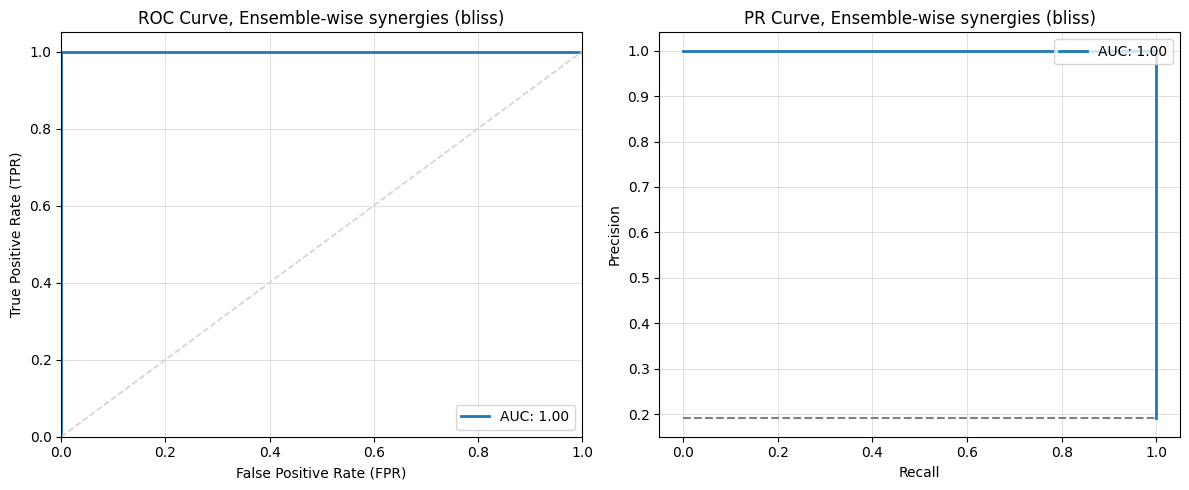

2024-10-30 23:08:38,366 - INFO - Predictions runtime: 9.07 seconds
2024-10-30 23:08:38,367 - INFO - Train runtime: 21.26
Total runtime: 30.33 seconds


In [43]:
executor.execute(
        train=True,
        predict=True,
        train_params={
            'boolean_model': boolean_model_bnet,
            'model_outputs': model_outputs,
            'training_data': training_data,
            'ga_args': ga_args,
            'ev_args': ev_args,
            'save_best_models': False,
            # 'save_path='./models',

        },
        predict_params={
            'best_boolean_models': None,
            'perturbations': perturbations,
            'model_outputs':model_outputs,
            'observed_synergy_scores': observed_synergy_scores,
            'synergy_method': 'bliss',
        }
    )

## Run only the Evolution

In [44]:
executor.train(
        boolean_model=boolean_model_sif,
        model_outputs=model_outputs,
        training_data=training_data,
        ga_args=ga_args,
        ev_args=ev_args,
        save_best_models=True,
        save_path='./models'
    )

2024-10-30 23:08:52,032 - INFO - Training has started...
2024-10-30 23:09:12,669 - INFO - Training finished.
2024-10-30 23:09:12,687 - INFO - Models saved to ./models
2024-10-30 23:09:12,688 - INFO - Train runtime: 20.66 seconds


## Run only the Predictions
**Important:** If you haven't run the Evolution before, you have to read the Boolean Models from a **.bnet** file and set **best_boolean_models=None**.

2024-10-30 23:09:19,848 - INFO - Prediction has started...
2024-10-30 23:09:28,948 - INFO - Response Matrix:
2024-10-30 23:09:28,949 - INFO -       e1_s1 e1_s2 e1_s3 e2_s1 e2_s2 e2_s3 e3_s1 e3_s2 e3_s3 e4_s1 e4_s2 e4_s3  \
PI-PD    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PI-CT   3.0   3.0    NA    NA    NA   2.0   3.0    NA    NA   2.0   3.0   2.0   
PI-BI   3.0   3.0    NA    NA    NA   2.0   3.0    NA    NA   2.0   3.0   2.0   
PI-PK   1.0   1.0    NA    NA    NA   0.0   1.0    NA    NA   0.0   0.0   0.0   
PI-AK   3.0   3.0   1.0   2.0   2.0   2.0   3.0   1.0   2.0   2.0   2.0   2.0   
PI-5Z    NA   2.0    NA    NA    NA   1.0   2.0    NA    NA   1.0   3.0   1.0   
PD-CT    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-BI   3.0   3.0   3.0   2.0   2.0   2.0   3.0   3.0   2.0   2.0   2.0   2.0   
PD-PK    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-AK    NA    NA    NA    NA    NA    NA    NA 

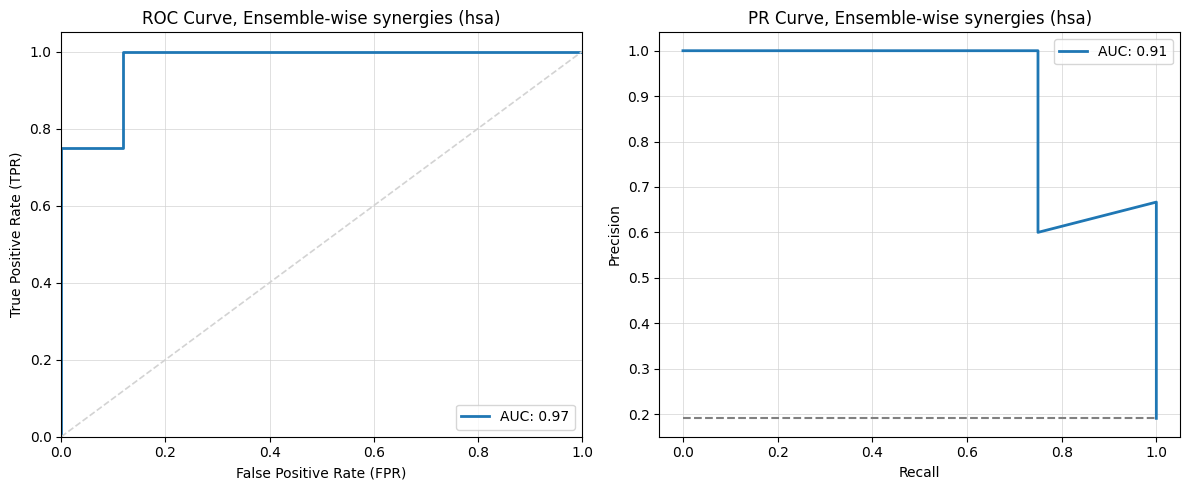

2024-10-30 23:09:29,171 - INFO - Predictions runtime: 9.32 seconds


In [45]:
executor.predict(
        perturbations=perturbations,
        model_outputs=model_outputs,
        observed_synergy_scores=observed_synergy_scores,
        synergy_method='hsa',
        best_boolean_models=None,
        model_directory = './pydruglogics/models/models_2024_10_15_1330',
        attractor_tool='biolqm_fixpoints'
    )

## Run Statistics

#### Init Evolution

In [46]:
evolution_calibrated = ev.Evolution(
        boolean_model=boolean_model_sif,
        model_outputs=model_outputs,
        training_data=training_data,
        ga_args=ga_args,
        ev_args=ev_args
    )

In [48]:
best_boolean_models_calibrated = evolution_calibrated.run()

2024-10-30 23:11:06,342 - INFO - Training finished.


In [49]:
evolution_random = ev.Evolution(
            boolean_model=boolean_model_sif,
            model_outputs=model_outputs,
            ga_args=ga_args,
            ev_args=ev_args)

2024-10-30 23:11:06,348 - INFO - Training data is initialized from list.


In [50]:
best_boolean_models_random = evolution_random.run()

2024-10-30 23:11:23,906 - INFO - Training finished.


#### Compare Evolutions run by calibrated and random data

In [51]:
statistics = st.Statistics(best_boolean_models_calibrated, observed_synergy_scores, model_outputs, perturbations)

2024-10-30 23:13:07,699 - INFO - Response Matrix:
2024-10-30 23:13:07,700 - INFO -       e1_s1 e1_s2 e1_s3 e2_s1 e2_s2 e2_s3 e3_s1 e3_s2 e3_s3 e4_s1 e4_s2 e4_s3  \
PI-PD    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PI-CT   3.0   3.0    NA    NA    NA   2.0   3.0    NA    NA   2.0   3.0   2.0   
PI-BI   3.0   3.0    NA    NA    NA   2.0   3.0    NA    NA   2.0   3.0   2.0   
PI-PK   1.0   1.0    NA    NA    NA   0.0   1.0    NA    NA   0.0   0.0   0.0   
PI-AK   3.0   3.0   1.0   2.0   2.0   2.0   3.0   1.0   2.0   2.0   2.0   2.0   
PI-5Z    NA   2.0    NA    NA    NA   1.0   2.0    NA    NA   1.0   3.0   1.0   
PD-CT    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-BI   3.0   3.0   3.0   2.0   2.0   2.0   3.0   3.0   2.0   2.0   2.0   2.0   
PD-PK    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-AK    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-5Z    NA    NA    NA   

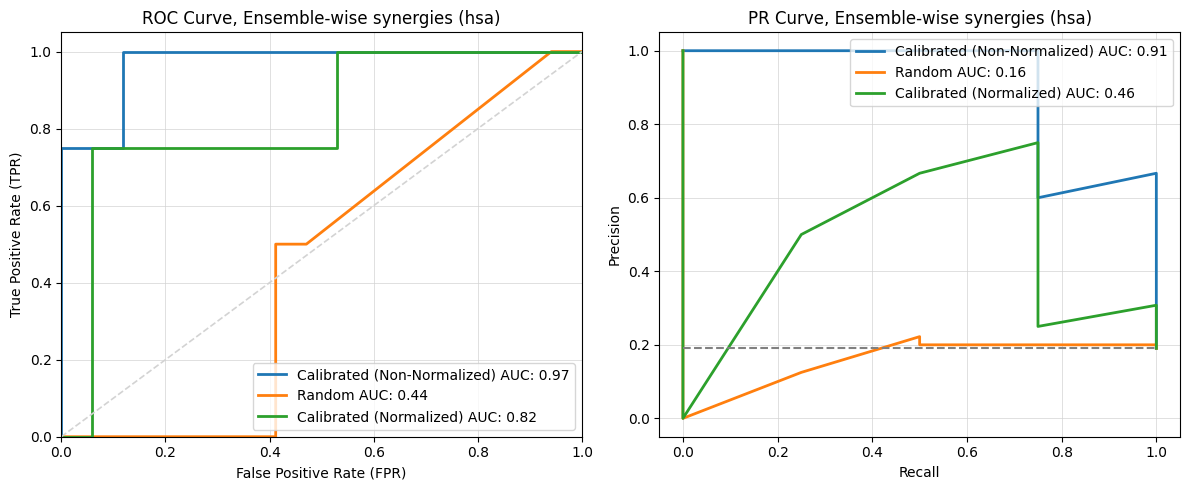

In [53]:
statistics.compare_two_simulations(best_boolean_models_calibrated, best_boolean_models_random,'Calibrated (Non-Normalized)', 'Random')

#### Sampling

2024-10-30 23:17:41,922 - INFO - Response Matrix:
2024-10-30 23:17:41,922 - INFO -       e14_s2 e8_s2 e19_s2 e24_s2 e1_s1 e9_s3 e14_s1 e22_s3 e4_s2 e15_s3  \
PI-PD     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PI-CT    3.0   3.0    3.0    3.0   3.0   3.0    3.0    3.0   3.0     NA   
PI-BI    3.0   3.0    3.0    3.0   3.0   3.0    3.0    3.0   3.0     NA   
PI-PK    1.0    NA    1.0    1.0   1.0    NA    1.0     NA   0.0     NA   
PI-AK    3.0   1.0    3.0    3.0   3.0   1.0    3.0    1.0   2.0    2.0   
PI-5Z    2.0   3.0    2.0    2.0    NA   3.0    2.0     NA   3.0     NA   
PD-CT     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PD-BI    3.0   3.0    3.0    3.0   3.0   3.0    3.0    3.0   2.0    2.0   
PD-PK     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PD-AK     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PD-5Z     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
CT-BI    3.0   3.

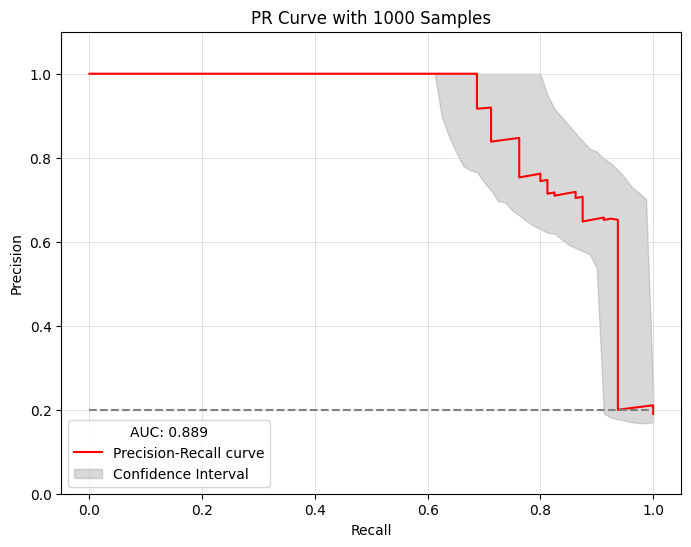

In [56]:
statistics.sampling_with_ci(repeat_time=20, sub_ratio=0.8, boot_n=1000, confidence_level=0.95,
                         plot_discrete=False, with_seeds=True)